<a href="https://colab.research.google.com/github/amirebm/ML-Implementation/blob/master/CNN_batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

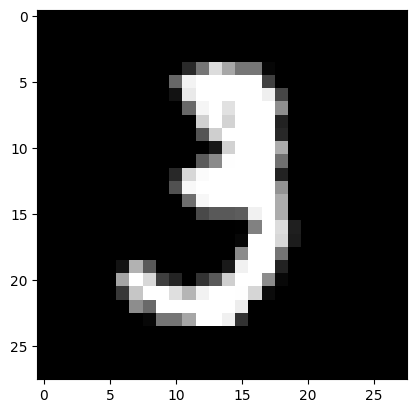

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10],cmap='gray')
plt.show()


#preproceccing

In [5]:
x_train = x_train.reshape(-1,28,28,1)#mishod bejaye -1, 60000 ro begzarim,
#ama ba -1 khodesh miad hamon 60000 ro dar nazar migire.hamin baraye paeen ham
#dar nazar gerefte mishe.
x_test = x_test.reshape(-1,28,28,1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
#Conv2d layer + BN + Actication
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
#max pool
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#Conv2d layer + BN + Actication
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

#max pool
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,642 (443.91 KB)

 Trainable params: 113,514 (443.41 KB)

 Non-trainable params: 128 (512.00 B)

In [10]:
hist=model.fit(x_train,y_train,epochs=10,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8369 - loss: 0.5641 - val_accuracy: 0.9811 - val_loss: 0.0616
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9823 - loss: 0.0589 - val_accuracy: 0.9862 - val_loss: 0.0426
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9881 - loss: 0.0385 - val_accuracy: 0.9869 - val_loss: 0.0419
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9905 - loss: 0.0307 - val_accuracy: 0.9861 - val_loss: 0.0390
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9921 - loss: 0.0253 - val_accuracy: 0.9903 - val_loss: 0.0288
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9882 - val_loss: 0.0334
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9943 - loss: 0.0180 - val_accuracy: 0.9870 - val_loss: 0.0433
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy

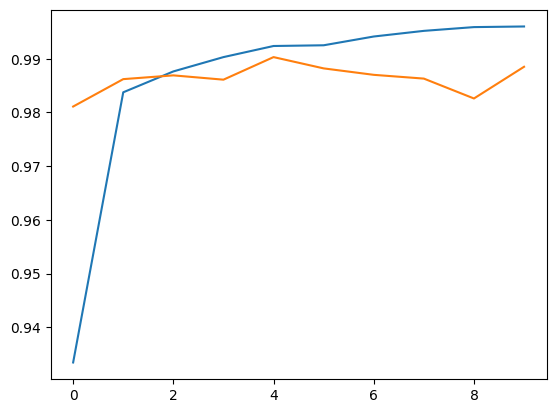

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()